### Combinatorial computation through promiscuous protein-protein interactions

This notebook represents graphically the response of a minimal promiscuous signaling system composed of **two ligands and two receptors**. The ligands can bind indistinctly to each of the receptors. Each binding reaction is defined by its dissociation constant $K_{ij}$, where the first subindex, $i$, denotes the ligand, and the second subindex, $j$, denotes the receptor. The output of the system is a weighted sum of the concentrations of the four possible ligand-receptor complexes, $C_{ij}$:
$$
S=\sum_{i,j}\varepsilon_{ij}C_{ij}
$$
In this expression, the weights $\varepsilon_{ij}$ define the *activities* of the corresponding complex.

Assuming that the binding reactions are at equilibrium and that the total concentrations of the receptors (free + bound) are constant in time, given by $R_{1T}$ and $R_{2T}$, leads in a straightforward manner to the following expression for the circuit output:
$$
S=\varepsilon_{11}R_{1T}\frac{L_1/K_{11}}{1+L_1/K_{11}+L_2/K_{21}}+
\varepsilon_{12}R_{2T}\frac{L_1/K_{12}}{1+L_1/K_{12}+L_2/K_{22}}+
\varepsilon_{21}R_{1T}\frac{L_2/K_{21}}{1+L_1/K_{11}+L_2/K_{21}}+
\varepsilon_{22}R_{2T}\frac{L_2/K_{22}}{1+L_1/K_{12}+L_2/K_{22}}
$$

In what follows, we represent this response as a function of the ligand levels $L_1$ and $L_2$ in three different parameter regimes, that correspond to three different computational modes.

First, we import all necessary Python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'weight' : 'normal',
        'size'   : 22}
rc('font', **font)

Next we define the response function and the ligand grid:

In [2]:
def s(l1,l2):
    s11 = e11*r1t*l1/k11/(1+l1/k11+l2/k21)
    s12 = e12*r2t*l1/k12/(1+l1/k12+l2/k22)
    s21 = e21*r1t*l2/k21/(1+l1/k11+l2/k21)
    s22 = e22*r2t*l2/k22/(1+l1/k12+l2/k22)
    return s11+s12+s21+s22

l1vec = np.logspace(-3,3,21)
l2vec = np.logspace(-3,3,21)
l1,l2 = np.meshgrid(l1vec,l2vec)

Finally, we plot this function for three different parameter sets.

First, we consider a situation in which the activities of the complexes formed by ligand 1 and receptor 2, $\varepsilon_{12}$, and by ligand 2 and receptor 1, $\varepsilon_{21}$, are much smaller than the other two. In this case, the system response can be approximated by the sum of two hyperbolically increasing functions of the ligand concentrations, which leads to an **additive** response.

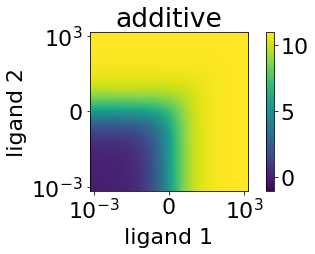

In [66]:
e11 = 1
e12 = 0.1
e21 = 0.1
e22 = 1

r1t = 10
r2t = 10

k11 = 1
k12 = 1
k21 = 1
k22 = 1

s1 = s(l1,l2)
s2=s1.reshape(len(l2),len(l1))

plt.imshow(s2,cmap='viridis',interpolation='bilinear', origin='lower', vmin=-1)
plt.xlabel('ligand 1')
plt.ylabel('ligand 2')
plt.gca().set_xticks([0,10,20])
plt.gca().set_xticklabels([r'10$^{-3}$','0',r'10$^3$'])
plt.gca().set_yticks([0,10,20])
plt.gca().set_yticklabels([r'10$^{-3}$','0',r'10$^3$'])
cbar = plt.colorbar()
cbar.set_ticks([0,5,10])
plt.title('additive')
plt.tight_layout()
plt.savefig('fig_additive.pdf')
plt.savefig('fig_additive.png')
plt.show()


Second, we consider the case of small total levels of receptor 2, $R_{2T}$, and small activity of the complex formed by ligand 2 and receptor 1, $\varepsilon_{21}$. In this situation, the response of the circuit to increasing levels of ligand 1 takes the form of a decreasing function of $L_2$, with a half-maximal threshold that increases with the amount of $L_1$.

Assuming additionally that $K_{11}$ and $K_{21}$ are small (in comparison with their corresponding ligand levels), the system output corresponds to a **ratiometric** computation.

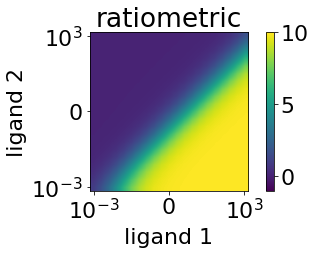

In [ ]:
e11 = 1
e12 = 1
e21 = 0.01
e22 = 1

r1t = 10
r2t = 0.01

k11 = 0.005
k12 = 1
k21 = 0.001
k22 = 1

s1 = s(l1,l2)
s2=s1.reshape(len(l2),len(l1))

plt.imshow(s2,cmap='viridis',interpolation='bilinear', origin='lower', vmin=-1)
plt.xlabel('ligand 1')
plt.ylabel('ligand 2')
plt.gca().set_xticks([0,10,20])
plt.gca().set_xticklabels([r'10$^{-3}$','0',r'10$^3$'])
plt.gca().set_yticks([0,10,20])
plt.gca().set_yticklabels([r'10$^{-3}$','0',r'10$^3$'])
cbar = plt.colorbar()
cbar.set_ticks([0,5,10])
plt.title('ratiometric')
plt.tight_layout()
plt.savefig('fig_ratiometric.pdf')
plt.savefig('fig_ratiometric.png')
plt.show()


Finally, we turn to a parameter regime in which the activities of the complexes formed by ligand 1 and receptor 2, $\varepsilon_{12}$, and by ligand 2 and receptor 1, $\varepsilon_{21}$, are much smaller than the other two, and the corresponding dissociation constants, $K_{12}$ and $K_{21}$, are much larger than their counterparts. In this case, the system response can take the form of a superposition of two hyperbolically increasing functions of the respective ligand concentrations, as in the additive case, but in this situation without interaction between the two ligand terms. Choosing appropriately the values of the dissociation constants $K_{11}$ and $K_{22}$ leads in this case to a **balance** response.

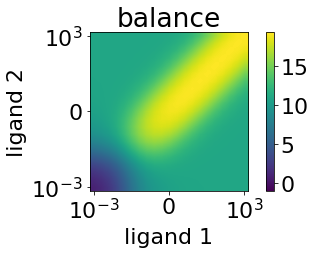

In [67]:
e11 = 1
e12 = 0.1
e21 = 0.1
e22 = 1

r1t = 10
r2t = 10

k11 = 0.02
k12 = 0.5
k21 = 0.5
k22 = 0.02

s1 = s(l1,l2)
s2=s1.reshape(len(l2),len(l1))

plt.imshow(s2,cmap='viridis',interpolation='bilinear', origin='lower', vmin=-1)
plt.xlabel('ligand 1')
plt.ylabel('ligand 2')
plt.gca().set_xticks([0,10,20])
plt.gca().set_xticklabels([r'10$^{-3}$','0',r'10$^3$'])
plt.gca().set_yticks([0,10,20])
plt.gca().set_yticklabels([r'10$^{-3}$','0',r'10$^3$'])
cbar = plt.colorbar()
cbar.set_ticks([0,5,10,15,20])
plt.title('balance')
plt.tight_layout()
plt.savefig('fig_balance.pdf')
plt.savefig('fig_balance.png')
plt.show()
